<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/topics/ml%20algos/_03_Polynomial_Regression_with_Multiple_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 1: Create a dummy dataset with three features (x1, x2, x3) and a target variable (y)
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)  # Feature 1
X2 = 3 * np.random.rand(100, 1)  # Feature 2
X3 = 4 * np.random.rand(100, 1)  # Feature 3
# Target variable with a polynomial relationship and noise
y = 5 + 3 * X1 + 2 * X2**2 - 4 * X3 + 1.5 * X1 * X2 + np.random.randn(100, 1)

In [ ]:
# Combine features into a single array
X = np.hstack((X1, X2, X3))

# Convert to a DataFrame for easier visualization
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3'])
data['Target'] = y

In [ ]:
data.head()

,Feature_1,Feature_2,Feature_3,Target
0,0.749080,0.094288,2.568127,-2.855970
1,1.901429,1.909231,0.336560,21.442174
2,1.463988,0.943068,0.646515,12.799563
3,1.197317,1.525712,3.594217,2.244739
4,0.312037,2.722699,2.425716,10.308664


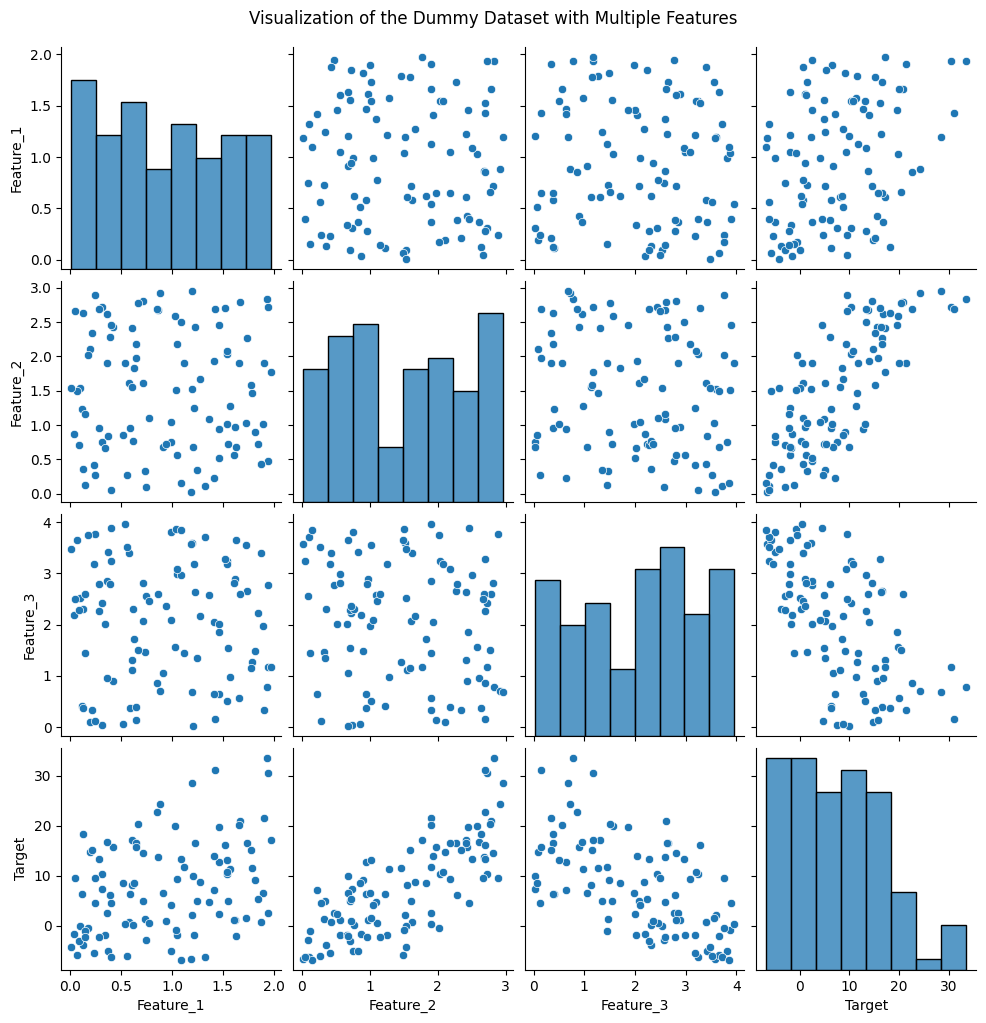

In [ ]:
# Step 2: Visualize the dataset (pairplot)
sns.pairplot(data)
plt.suptitle('Visualization of the Dummy Dataset with Multiple Features', y=1.02)
plt.show()

In [ ]:
# Step 3: Create Polynomial Features (up to degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train the Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 6: Predict and evaluate the model
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²) Score: {r2:.3f}")

Mean Squared Error (MSE): 2.117
R-squared (R²) Score: 0.970


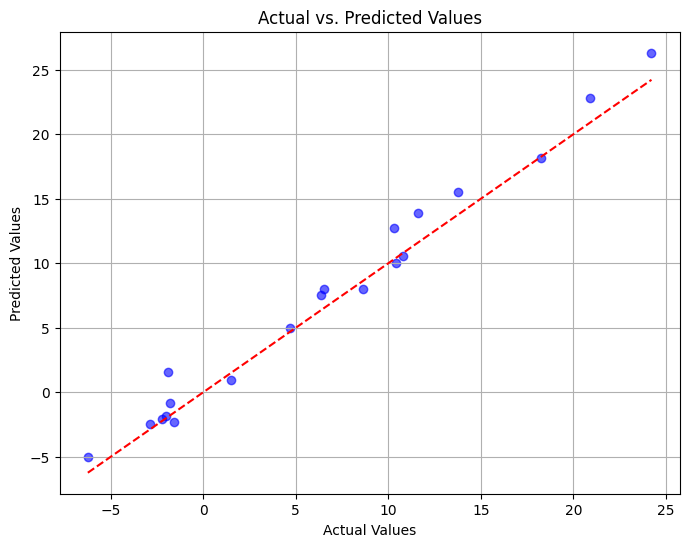

In [ ]:
# Step 7: Visualize Actual vs. Predicted values with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
# Step 8: Heatmap for Evaluating the Model
# Create a DataFrame of actual vs predicted values and calculate the error
eval_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
eval_df['Error'] = eval_df['Actual'] - eval_df['Predicted']

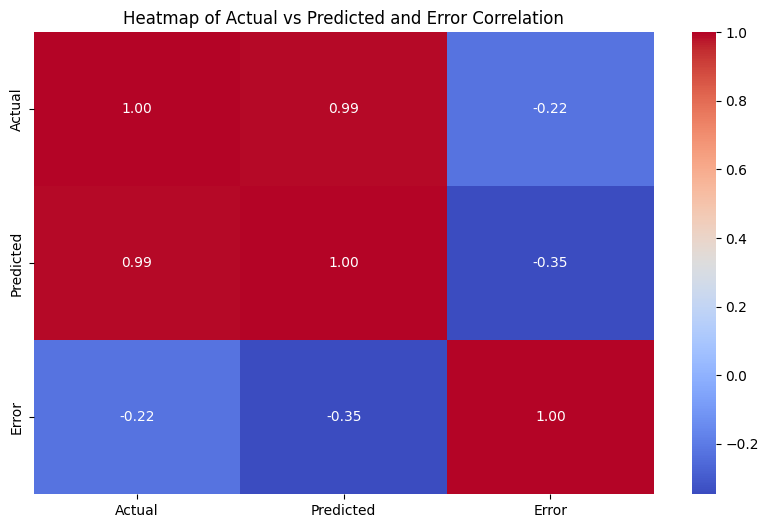

In [ ]:
# Plotting the heatmap to visualize correlations and errors
plt.figure(figsize=(10, 6))
sns.heatmap(eval_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Actual vs Predicted and Error Correlation')
plt.show()